In [35]:
import pandas as pd
import duckdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [36]:
from sklearn.metrics import mean_squared_error,r2_score,classification_report,accuracy_score,confusion_matrix

In [51]:
df=pd.read_csv('country_wise_latest (1).csv')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


SQL Data handling


In [38]:
query="""
SELECT "Country/Region",Confirmed
FROM df
LIMIT 10
"""
df=duckdb.query(query).to_df()
print(df)

        Country/Region  Confirmed
0          Afghanistan      36263
1              Albania       4880
2              Algeria      27973
3              Andorra        907
4               Angola        950
5  Antigua and Barbuda         86
6            Argentina     167416
7              Armenia      37390
8            Australia      15303
9              Austria      20558


In [39]:
query="""
SELECT "Country/Region",MAX(Confirmed) AS "Confirmed Cases"
FROM df
GROUP BY "Country/Region"
ORDER BY "Confirmed Cases" DESC
LIMIT 10
"""
df=duckdb.query(query).to_df()
print(df)

        Country/Region  Confirmed Cases
0            Argentina           167416
1              Armenia            37390
2          Afghanistan            36263
3              Algeria            27973
4              Austria            20558
5            Australia            15303
6              Albania             4880
7               Angola              950
8              Andorra              907
9  Antigua and Barbuda               86


In [43]:
query="""
SELECT "Country/Region",MAX(Deaths) as "Most Deaths"
FROM df
GROUP BY "Country/Region"
ORDER BY "Most Deaths" DESC
LIMIT 10
"""
df=duckdb.query(query).to_df()
print(df)

   Country/Region  Most Deaths
0              US       148011
1          Brazil        87618
2  United Kingdom        45844
3          Mexico        44022
4           Italy        35112
5           India        33408
6          France        30212
7           Spain        28432
8            Peru        18418
9            Iran        15912


In [45]:
query="""
SELECT "Country/Region",MAX(Recovered) as "Most Recovered"
FROM df
GROUP BY "Country/Region"
ORDER BY "Most Recovered" DESC
LIMIT 10
"""
df=duckdb.query(query).to_df()
print(df)

  Country/Region  Most Recovered
0         Brazil         1846641
1             US         1325804
2          India          951166
3         Russia          602249
4          Chile          319954
5         Mexico          303810
6   South Africa          274925
7           Peru          272547
8           Iran          255144
9       Pakistan          241026


In [48]:
query = """
SELECT "WHO Region",SUM("New cases") AS TotalNewCases
FROM df
WHERE "WHO Region" = 'Europe'
GROUP BY "WHO Region"
ORDER BY TotalNewCases DESC
"""
df= duckdb.query(query).to_df()
print(df)


  WHO Region  TotalNewCases
0     Europe        22294.0


In [50]:
query="""
SELECT "WHO Region",SUM(Confirmed) AS TotalConfirmed,
SUM(Deaths) AS TotalDeaths,SUM(Recovered) AS TotalRecovered
FROM df
GROUP BY "WHO Region"
"""
df=duckdb.query(query).to_df()
print(df)

              WHO Region  TotalConfirmed  TotalDeaths  TotalRecovered
0                 Europe       3299523.0     211144.0       1993723.0
1                 Africa        723207.0      12223.0        440645.0
2  Eastern Mediterranean       1490744.0      38339.0       1201400.0
3               Americas       8839286.0     342732.0       4468616.0
4        Western Pacific        292428.0       8249.0        206770.0
5        South-East Asia       1835297.0      41349.0       1156933.0


In [52]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


Total deaths

In [53]:
df['Deaths'].sum()

np.int64(654036)

New deaths

In [54]:
df['New deaths'].sum()

np.int64(5415)

Total recovered

In [55]:
df['Recovered'].sum()

np.int64(9468087)

In [56]:
pak_deaths=df[df["Country/Region"]=="Pakistan"]["Deaths"].sum()
print("Death in Pakistan",pak_deaths)

Death in Pakistan 5842


In [57]:
recover_pakistan=df[df['Country/Region']=='Pakistan']['Recovered'].sum()
print("Recovery in Pakistan",recover_pakistan)

Recovery in Pakistan 241026


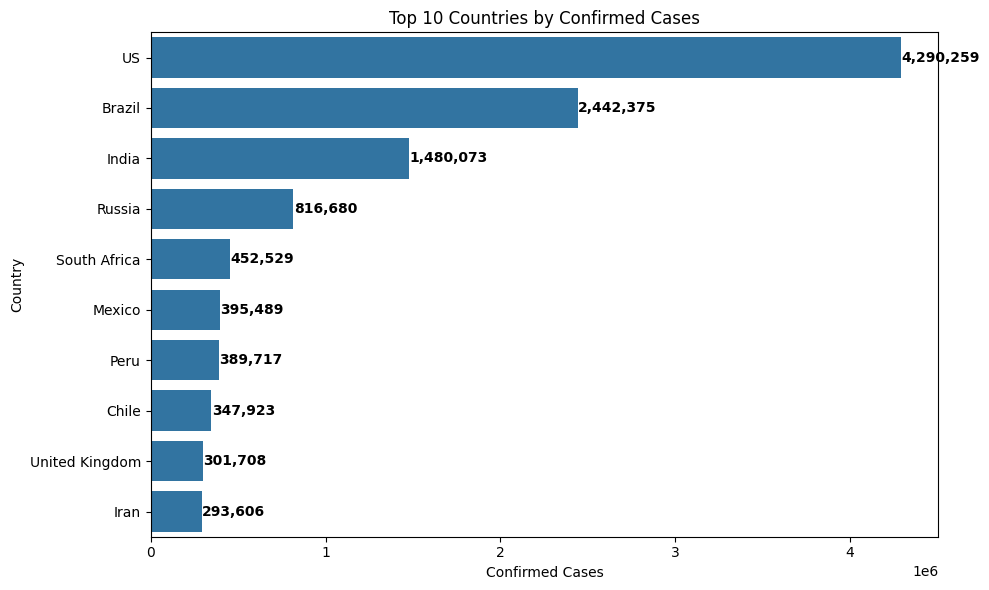

In [58]:
top_countries = df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")

for i, value in enumerate(top_countries.values):
    plt.text(value + 1000, i, f"{value:,}", va='center',fontweight='bold')  # +1000 to move text a bit right

plt.tight_layout()
plt.show()


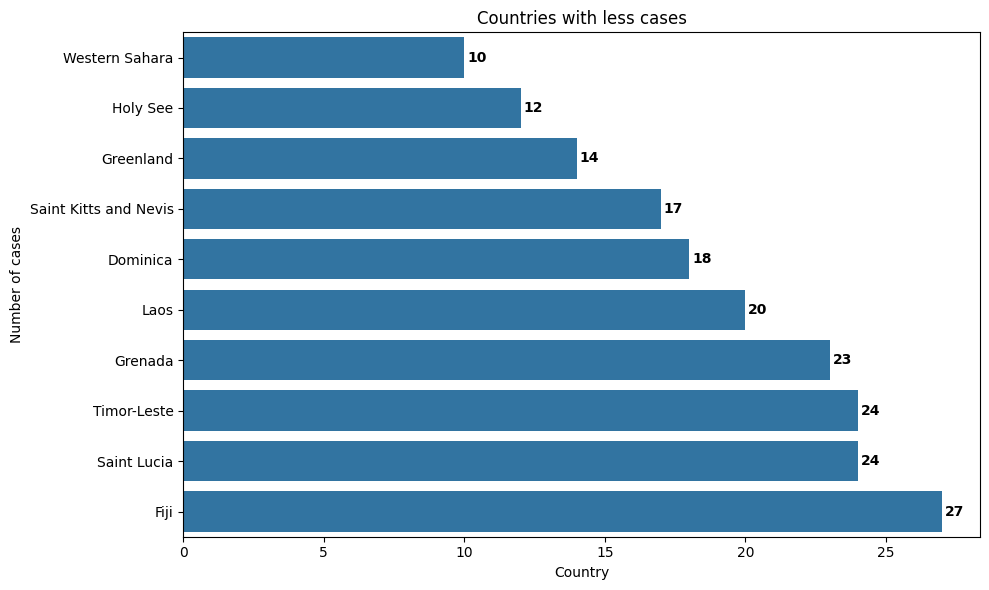

In [59]:
lowest_countries=df.groupby('Country/Region')['Confirmed'].min().sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=lowest_countries.values,y=lowest_countries.index)
plt.title("Countries with less cases")
plt.xlabel("Country")
plt.ylabel("Number of cases")

for a , values in enumerate(lowest_countries.values):
  plt.text(values+0.1,a,f"{values:,}",va="center",fontweight='bold')

plt.tight_layout()
plt.show()

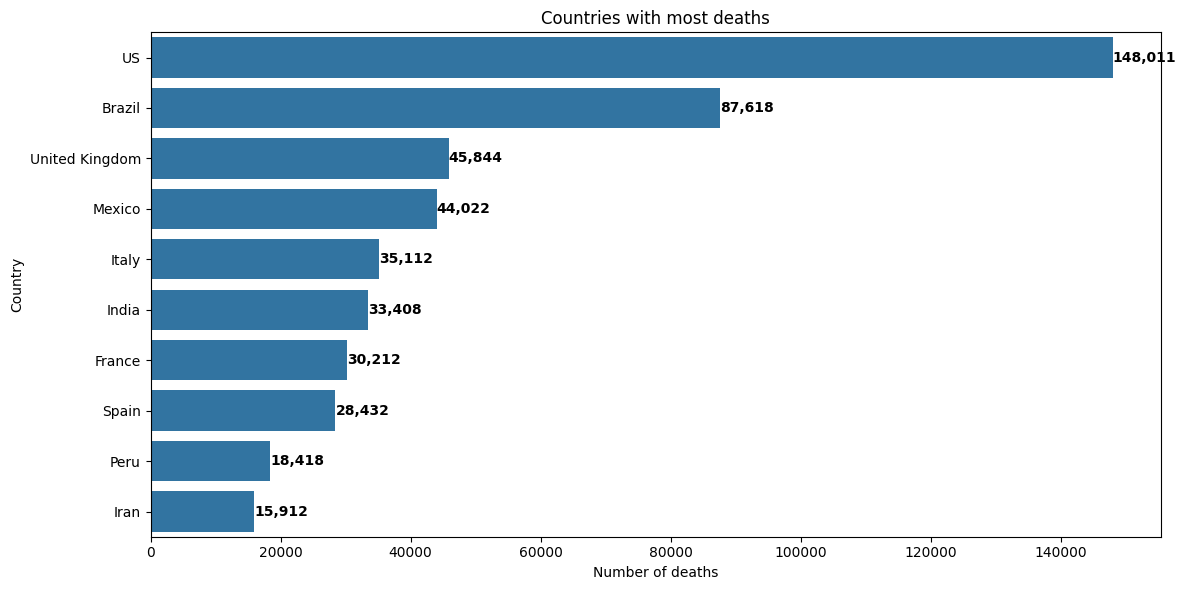

In [60]:
most_deaths=df.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))

sns.barplot(x=most_deaths.values,y=most_deaths.index)
plt.title("Countries with most deaths")
plt.xlabel("Number of deaths")
plt.ylabel("Country")


for a , values in enumerate(most_deaths.values):
  plt.text(values+0.1,a,f"{values:,}",va="center",fontweight='bold')

plt.tight_layout()
plt.show()

In [61]:
df[df['Country/Region']=='US']['Active'].sum()

np.int64(2816444)

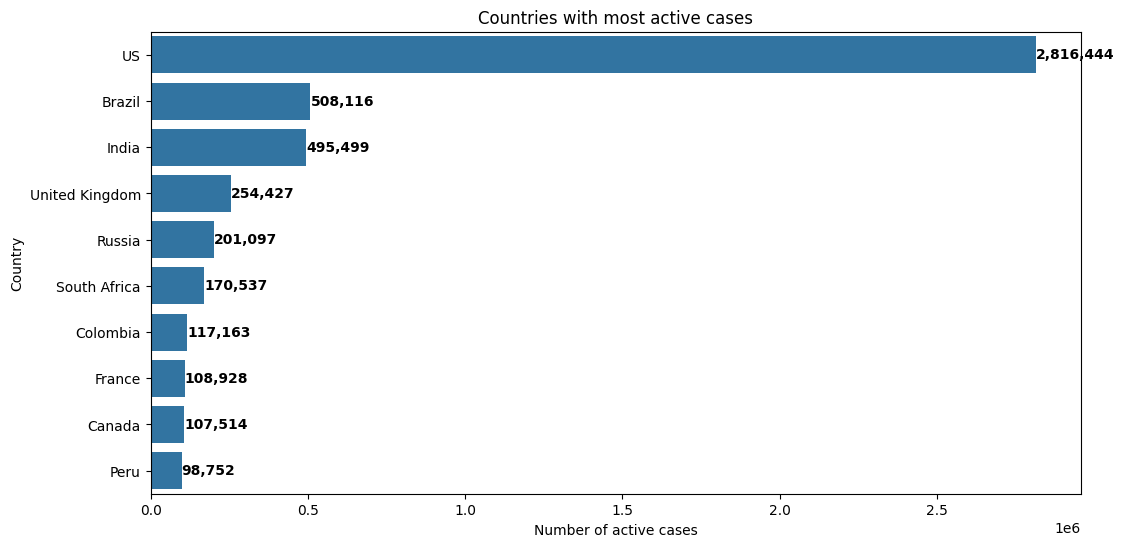

In [62]:
active_cases=df.groupby('Country/Region')['Active'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))

sns.barplot(x=active_cases.values,y=active_cases.index)
plt.xlabel('Number of active cases')
plt.ylabel('Country')
plt.title("Countries with most active cases")


for a , values in enumerate(active_cases.values):
  plt.text(values+0.1,a,f"{values:,}",va='center',fontweight='bold')

plt.show()

In [63]:
corr_data=df[['Deaths','Recovered','Active','Confirmed']]

In [64]:
corr_matrix=corr_data.corr()

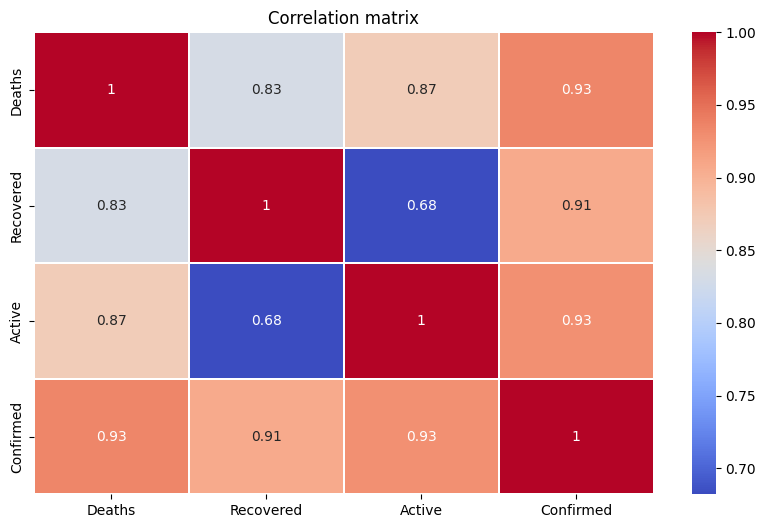

In [65]:
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidth=0.1)
plt.title("Correlation matrix")
plt.show()

In [66]:
X=df[['Deaths','Recovered','Active','New cases']]
y=df['Confirmed']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred=model.predict(X_test)

In [70]:
print("Mean squared error",mean_squared_error(y_test,y_pred))
print("R^2 score : ",r2_score(y_test,y_pred))

Mean squared error 1.4792168572976274e-20
R^2 score :  1.0


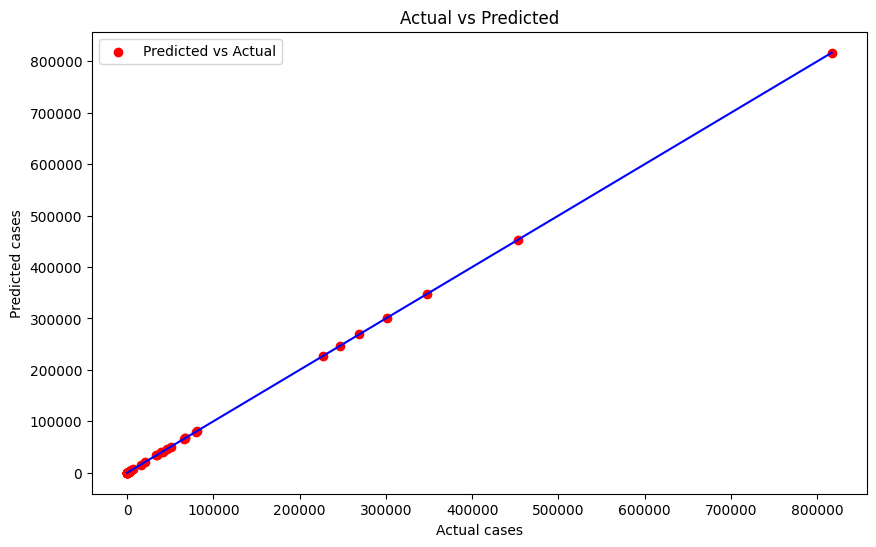

In [71]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_pred,color='red',label="Predicted vs Actual")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='blue')
plt.xlabel("Actual cases")
plt.ylabel("Predicted cases")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

In [72]:
def label_severity(y):
  if y < 1000:
    return "Low"
  elif y < 10000:
    return "Medium"
  else:
    return "High"

df['Severity']=df['Confirmed'].apply(label_severity)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Severity
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,High
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,Medium
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,High
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,Low
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,High
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,Low
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,Medium
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,Medium


In [73]:
severity_map=({'Low':1,'Medium':2,'High':3})
df['severity_num']=df['Severity'].map(severity_map)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Severity,severity_num
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,High,3
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,Medium,2
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,High,3
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,Low,1
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,High,3
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,Low,1
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,Medium,2
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,Medium,2


In [74]:
X=df[['Deaths','Recovered','Active']]
y=df['severity_num']

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [76]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred=model.predict(X_test)

In [78]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Classification report",classification_report(y_test,y_pred))
print("Classification martix",confusion_matrix(y_test,y_pred))

Accuracy score :  0.9649122807017544
Classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.89      0.94        19
           3       0.92      1.00      0.96        24

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.97        57
weighted avg       0.97      0.96      0.96        57

Classification martix [[14  0  0]
 [ 0 17  2]
 [ 0  0 24]]


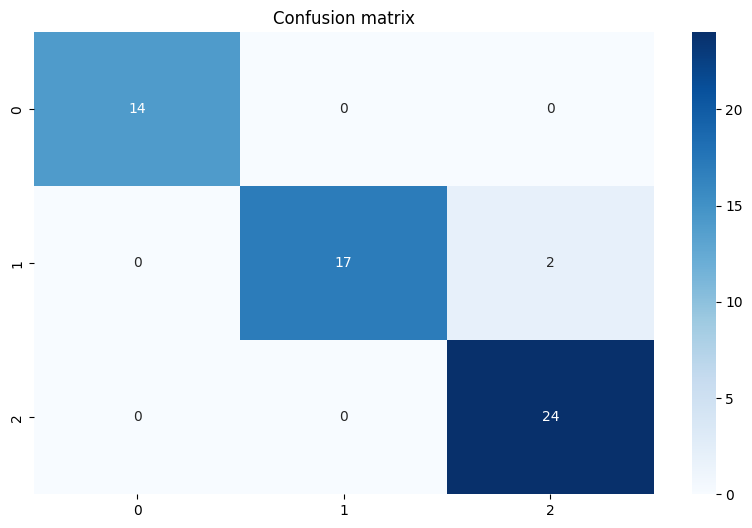

In [79]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,6))

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion matrix")
plt.show()

# accuracy=correct predictions/total samples

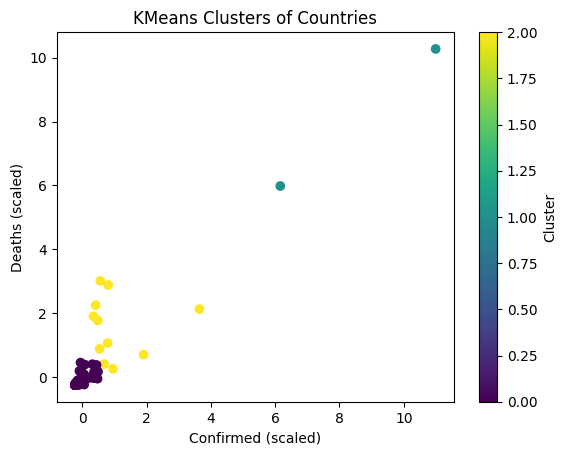

In [80]:
features = df.groupby("Country/Region")[['Confirmed','Deaths','Recovered']].max().reset_index()
X = features[['Confirmed','Deaths','Recovered']]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3)
features['Cluster'] = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=features['Cluster'], cmap='viridis')
plt.xlabel('Confirmed (scaled)')
plt.ylabel('Deaths (scaled)')
plt.title('KMeans Clusters of Countries')
plt.colorbar(label='Cluster')
plt.show()

In [81]:
df=df.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].max().reset_index()
df['Risk']=(df['Confirmed']>100000).astype(int)

In [82]:
X=df[['Confirmed','Deaths','Recovered']]
y=df['Risk']

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [84]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [86]:
y_pred=model.predict(X_test)

In [87]:
print("Confusion matrix : ",confusion_matrix(y_test,y_pred))
print("Accuracy score : ",accuracy_score(y_test,y_pred))

Confusion matrix :  [[28  3]
 [ 0  7]]
Accuracy score :  0.9210526315789473


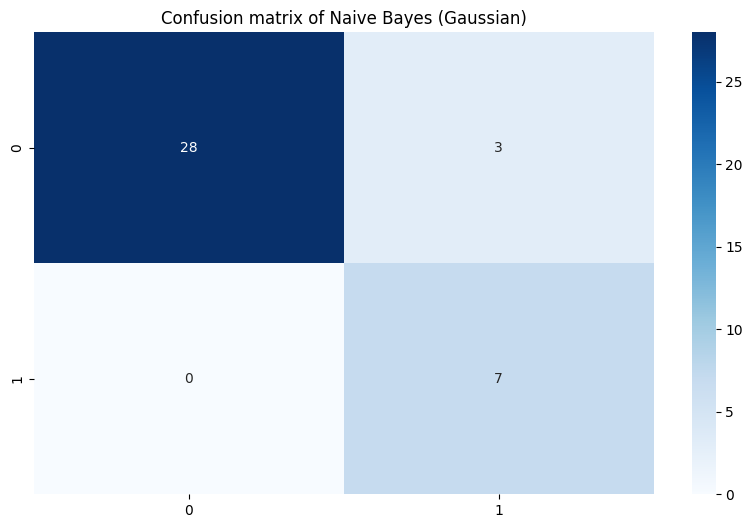

In [88]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion matrix of Naive Bayes (Gaussian)")
plt.show()

In [89]:
df=df.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].max().reset_index()
df['Risk']=(df['Confirmed']>100000).astype(int)

In [90]:
X=df[['Confirmed','Deaths','Recovered']]
y=df['Risk']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [92]:
model=BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

In [93]:
y_pred=model.predict(X_test)

In [94]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Confusion matrix",confusion_matrix(y_test,y_pred))

Accuracy score :  0.8157894736842105
Confusion matrix [[31  0]
 [ 7  0]]


In [95]:
cm=confusion_matrix(y_test,y_pred)

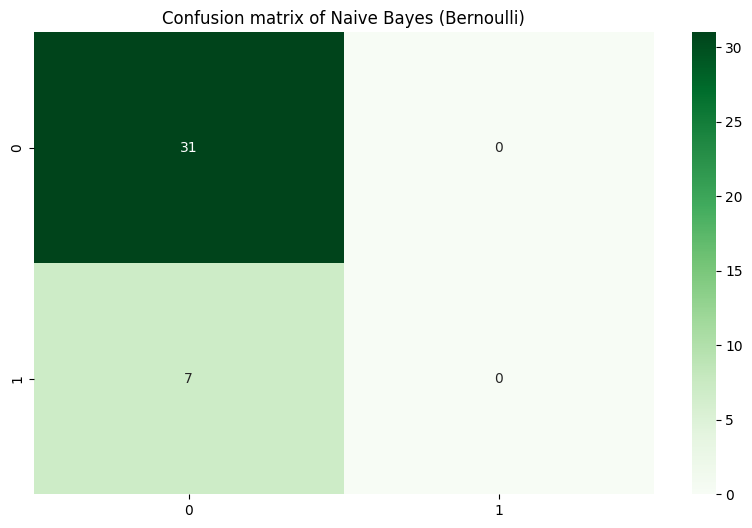

In [96]:
plt.figure(figsize=(10,6))

sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')

plt.title("Confusion matrix of Naive Bayes (Bernoulli)")
plt.show()